# Imports

In [1]:
import matplotlib.patches as mpatches
from matplotlib.patches import Rectangle
from matplotlib.ticker import PercentFormatter
from math import radians

import warnings
warnings.filterwarnings('ignore')

# Data
*from 2019

In [2]:
hicks = pd.read_csv('../data/jordan-hicks.csv')
hicks.drop(columns = ['Unnamed: 0'], inplace = True)
#hicks = hicks.loc[hicks['pitch_type'] != 'FF']

# Font Dictionary
font_title = {
    'size': 12,
    'weight': 'bold',
    'verticalalignment': 'center_baseline',
    'horizontalalignment': 'center'
}

pd.set_option('max_columns', None)
print(hicks.shape)
hicks.head(2)

(454, 89)


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,pitch_count,plate_-x,pfx_-x,swing_miss
0,SL,2019-06-22,81.8,-2.53,6.23,"Hicks, Jordan",664058,663855,strikeout,swinging_strike,7.0,David Fletcher strikes out swinging.,R,R,R,STL,LAA,S,2.0,NaN,2,2,2019,0.73,-7.80,-0.28,1.89,NaN,NaN,NaN,1,9,Top,NaN,NaN,425877,3.655294,-118.971019,-2.03459,6.113391,21.105710,-38.047422,3.12,1.52,NaN,NaN,NaN,80.9,2327.0,5.5,566606,663855,425877,502671,543939,572761,657557,542303,664056,451594,54.99,NaN,NaN,0.0,1.0,0.0,0.0,NaN,65,6,Slider,4,2,2,4,2,4,2,4,Standard,Standard,49.0,0.023,-0.156,1,2-2,0.28,-8.76,1
1,SI,2019-06-22,99.8,-2.40,6.47,"Hicks, Jordan",664058,663855,NaN,foul,1.0,David Fletcher strikes out swinging.,R,R,R,STL,LAA,S,NaN,NaN,2,2,2019,-1.34,10.68,-0.34,2.72,NaN,NaN,NaN,1,9,Top,NaN,NaN,425877,8.631231,-144.959937,-6.95977,-20.462599,29.798023,-18.527721,3.20,1.52,NaN,NaN,NaN,99.2,2065.0,5.8,566606,663855,425877,502671,543939,572761,657557,542303,664056,451594,54.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65,5,Sinker,4,2,2,4,2,4,2,4,Standard,Standard,236.0,0.000,0.000,1,2-2,0.34,16.08,0


In [3]:
spin_axis = hicks.groupby(['pitch_type']).mean()
spin_axis

,release_speed,release_pos_x,release_pos_z,batter,pitcher,zone,hit_location,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,hc_x,hc_y,fielder_2,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,spin_axis,delta_home_win_exp,delta_run_exp,is_strike,plate_-x,pfx_-x,swing_miss
pitch_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CH,91.028571,-2.564762,6.058571,571518.904762,663855.0,11.476190,2.625000,0.809524,1.714286,2019.0,-0.580000,0.988571,-0.303333,1.145714,518735.000000,444489.0000,567754.666667,1.000000,9.142857,134.845000,158.655000,447173.809524,6.809072,-132.174358,-6.548387,-8.139082,27.017416,-30.082025,3.293810,1.590952,5.500000,82.050000,-20.000000,90.295238,1102.941176,5.866667,566745.523810,663855.0,447173.809524,506008.619048,543939.000000,580684.857143,657557.000000,551739.476190,664056.000000,523660.571429,54.635714,0.093000,0.091500,0.077778,1.0,0.000000,0.000000,2.000000,71.809524,3.666667,3.666667,3.142857,2.904762,3.904762,3.142857,3.666667,2.904762,3.904762,265.523810,0.001952,-0.050714,0.523810,0.303333,6.960000,0.333333
FF,100.900000,-2.190000,6.510000,592885.000000,663855.0,11.000000,NaN,0.000000,2.000000,2019.0,-0.780000,15.480000,-0.790000,4.050000,518735.000000,444489.0000,592325.000000,2.000000,9.000000,NaN,NaN,425877.000000,5.657839,-146.827975,-4.514448,-12.396737,32.482756,-12.960673,3.080000,1.490000,NaN,NaN,NaN,100.500000,2201.000000,5.900000,566579.000000,663855.0,425877.000000,502671.000000,543939.000000,572761.000000,657557.000000,542303.000000,664056.000000,657041.000000,54.550000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,3.000000,5.000000,2.000000,2.000000,5.000000,2.000000,5.000000,2.000000,5.000000,211.000000,0.000000,0.062000,0.000000,0.790000,9.360000,0.000000
SI,101.141538,-2.336769,6.235154,564258.943609,663855.0,8.311538,4.847458,1.007519,0.766917,2019.0,-1.312038,10.253538,-0.023385,2.450846,567780.666667,564257.0000,547522.788235,0.917293,9.030075,128.123529,141.216078,437791.451128,9.524201,-146.853866,-7.244040,-21.087281,32.668508,-18.400158,3.337038,1.595962,129.388889,83.775641,5.705128,101.026154,2033.107692,6.211538,566659.849624,663855.0,437791.451128,503461.488722,546294.319549,575599.372180,656492.669173,552632.447368,651521.244361,507763.432331,54.288346,0.232708,0.251979,0.259559,1.0,0.147059,0.088235,2.666667,69.312030,2.849624,3.424812,2.721805,2.387218,3.759398,2.729323,3.432331,2.402256,3.759398,236.919231,0.001861,-0.007011,0.590226,0.023385,15.744462,0.037594
SL,86.973856,-2.585490,6.069869,562260.307190,663855.0,10.169935,3.560000,0.830065,1.078431,2019.0,0.870915,-1.038431,0.577516,2.063922,543265.000000,545958.5625,543490.830189,0.967320,9.052288,120.629000,122.434000,442199.026144,5.794769,-126.463636,-3.243078,7.993790,25.012083,-32.565437,3.309935,1.590131,154.952381,82.842857,13.809524,86.309150,2439.370861,5.832026,566658.294118,663855.0,442199.026144,502671.000000,545576.947712,574157.529412,655937.895425,554298.326797,658088.790850,510646.039216,54.665686,0.296700,0.342200,0.217857,1.0,0.107143,0.107143,3.100000,69.209150,3.013072,3.261438,2.581699,2.111111,3.732026,2.594771,3.267974,2.130719,3.732026,86.777778,-0.004078,-0.015908,0.620915,-0.577516,-10.450980,0.235294


In [4]:
r_hicks = hicks.loc[hicks['stand'] == 'R']
l_hicks = hicks.loc[hicks['stand'] == 'L']

si = hicks.loc[hicks['pitch_type'] == 'SI']
sl = hicks.loc[hicks['pitch_type'] == 'SL']
ch = hicks.loc[hicks['pitch_type'] == 'CH']
ff = hicks.loc[hicks['pitch_type'] == 'FF']

r_si = hicks.loc[(hicks['pitch_type'] == 'SI') & (hicks['stand'] == 'R')]
r_sl = hicks.loc[(hicks['pitch_type'] == 'SL') & (hicks['stand'] == 'R')]
r_ch = hicks.loc[(hicks['pitch_type'] == 'CH') & (hicks['stand'] == 'R')]
r_ff = hicks.loc[(hicks['pitch_type'] == 'FF') & (hicks['stand'] == 'R')]

l_si = hicks.loc[(hicks['pitch_type'] == 'SI') & (hicks['stand'] == 'L')]
l_sl = hicks.loc[(hicks['pitch_type'] == 'SL') & (hicks['stand'] == 'L')]
l_ch = hicks.loc[(hicks['pitch_type'] == 'CH') & (hicks['stand'] == 'L')]
l_ff = hicks.loc[(hicks['pitch_type'] == 'FF') & (hicks['stand'] == 'L')]

In [5]:
hicks.pitch_type.value_counts(normalize=True)

SI    0.603175
SL    0.346939
CH    0.047619
FF    0.002268
Name: pitch_type, dtype: float64

# Pitcher Overview

### Pitch Distribution

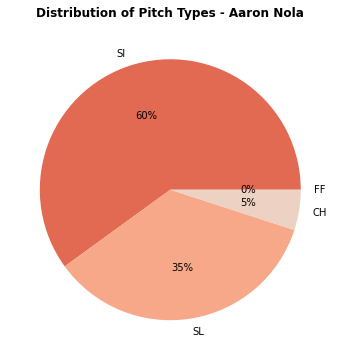

In [6]:
plt.figure(figsize = (8, 6))

dist = round(hicks.pitch_type.value_counts(normalize = True), 2)
labels = ['SI', 'SL', 'CH', 'FF']
color = sns.color_palette('coolwarm_r')

plt.pie(dist, labels = labels, colors = color, autopct = '%.0f%%')
plt.title('Distribution of Pitch Types - Aaron Nola', fontdict = font_title, pad = 15);

### Pitch Usage by Batter Handedness

In [7]:
blue = '#0E3386'
red = '#CC3433'
#fig, axs = plt.subplots(1, 2, figsize = (20, 6))
#fig.suptitle('Pitch Usage by Batter Handedness', fontsize = 20, fontweight = 'bold')
#
#dist_r = r_hicks.pitch_type.sort_values()
#axs[0].hist(dist_r, weights = np.ones(len(dist_r)) / len(dist_r), color = blue)
#axs[0].yaxis.set_major_formatter(PercentFormatter(1))
#axs[0].set_title('Distribution of Pitch Types - RHH', fontdict = font_title, pad = 15)
#
#dist_l = l_hicks.pitch_type.sort_values()
#axs[1].hist(dist_l, weights = np.ones(len(dist_l)) / len(dist_l), color = red)
#axs[1].yaxis.set_major_formatter(PercentFormatter(1))
#axs[1].set_title('Distribution of Pitch Types - LHH', fontdict = font_title, pad = 15);

### Velocity by Pitch Type

SI velo sits: 100 - 102 mph,  max: 104.3 mph
FF velo sits: 86 - 89 mph,  max: 91.4 mph
CH velo sits: 90 - 92 mph,  max: 94.6 mph
FC velo sits: 101 - 101 mph,  max: 100.9 mph


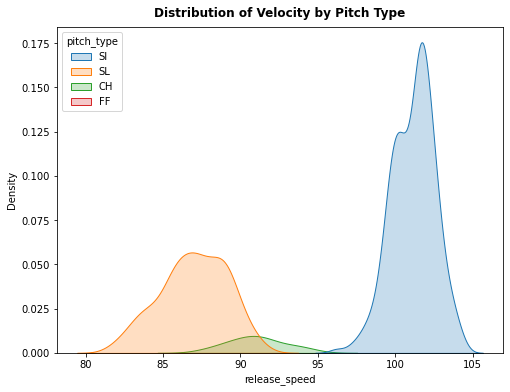

In [8]:
plt.figure(figsize = (8, 6))

ax = sns.kdeplot(data = hicks, x = 'release_speed', shade = 'fill', 
            multiple = 'layer', hue = 'pitch_type', 
            hue_order = ['SI', 'SL', 'CH', 'FF'], 
            palette = 'tab10')
sns.move_legend(ax, 'upper left')
plt.title('Distribution of Velocity by Pitch Type', fontdict = font_title, pad = 15);
print('SI velo sits:', round(si['release_speed'].quantile(.25)), '-', round(si['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(si['release_speed'].max(), 2), 'mph')
print('FF velo sits:', round(sl['release_speed'].quantile(.25)), '-', round(sl['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(sl['release_speed'].max(), 2), 'mph')
print('CH velo sits:', round(ch['release_speed'].quantile(.25)), '-', round(ch['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ch['release_speed'].max(), 2), 'mph')
print('FC velo sits:', round(ff['release_speed'].quantile(.25)), '-', round(ff['release_speed'].quantile(.75)), 
      'mph, ', 'max:', round(ff['release_speed'].max(), 2), 'mph');

# Pitcher Stuff

### Velocity & Spin Rate

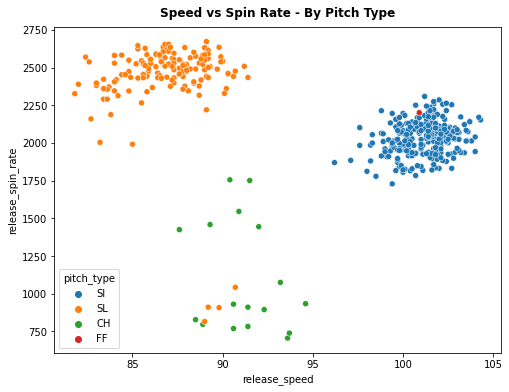

In [9]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = hicks, x = 'release_speed', y = 'release_spin_rate', hue = 'pitch_type', 
                hue_order = ['SI', 'SL', 'CH', 'FF'], palette = 'tab10')
plt.title('Speed vs Spin Rate - By Pitch Type', fontdict = font_title, pad = 15);

### Spin Axis

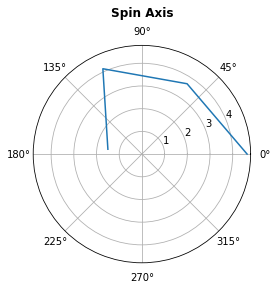

In [10]:
ax = plt.subplot(polar = True)

ax.plot([radians(x) for x in spin_axis['spin_axis'].values])
ax.set_title('Spin Axis', fontdict = font_title, pad = 15);

### Horizontal & Vertical Break Axis

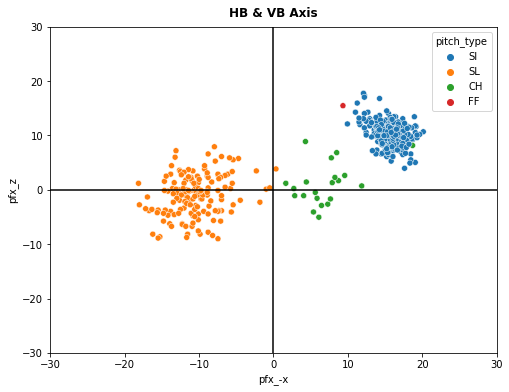

In [11]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = hicks, x = 'pfx_-x', y = 'pfx_z', hue = 'pitch_type', 
                hue_order = ['SI', 'SL', 'CH', 'FF'], palette = 'tab10')
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')
plt.title('HB & VB Axis', fontdict = font_title, pad = 15);

### Release Position
*from hitters' perspective

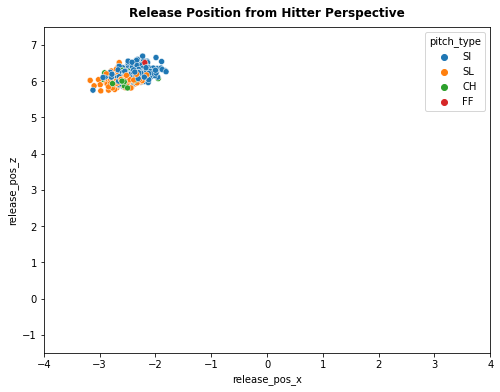

In [12]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = hicks, x = 'release_pos_x', y = 'release_pos_z', hue = 'pitch_type', 
                hue_order = ['SI', 'SL', 'CH', 'FF'], palette = 'tab10')
plt.xlim(-4, 4)
plt.ylim(-1.5, 7.5)
plt.title('Release Position from Hitter Perspective', fontdict = font_title, pad = 15);

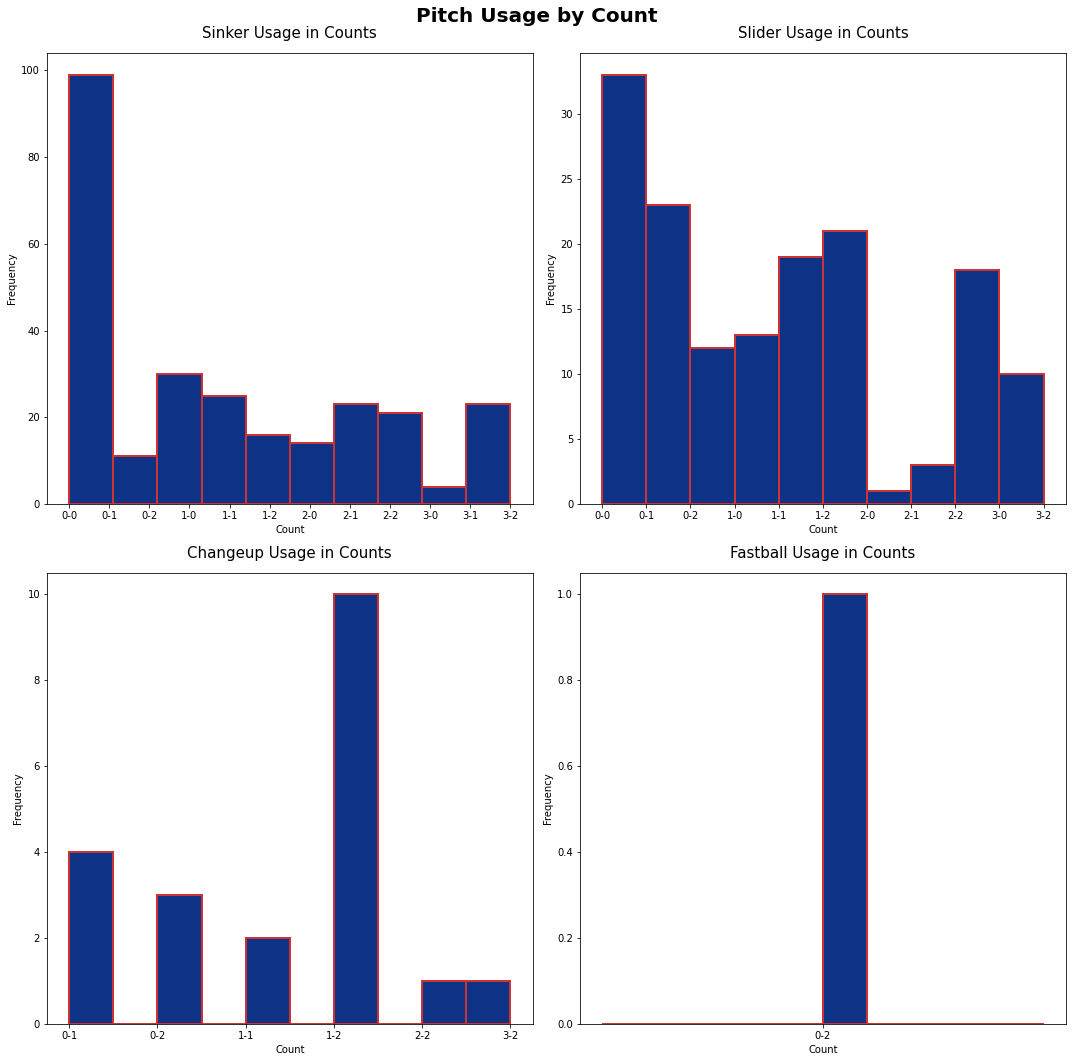

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))
fig.suptitle('Pitch Usage by Count', fontsize = 20, fontweight = 'bold')
plt.setp(axs[0:, :], xlabel = 'Count')
plt.setp(axs[:, 0:], ylabel = 'Frequency')
axs[0][0].hist(si['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][0].set_title('Sinker Usage in Counts', fontsize = 15, pad = 15)
axs[0][1].hist(sl['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[0][1].set_title('Slider Usage in Counts', fontsize = 15, pad = 15)
axs[1][0].hist(ch['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][0].set_title('Changeup Usage in Counts', fontsize = 15, pad = 15)
axs[1][1].hist(ff['pitch_count'].sort_values(ascending = True), color = blue, edgecolor = red, linewidth = 2)
axs[1][1].set_title('Fastball Usage in Counts', fontsize = 15, pad = 15)
plt.tight_layout();

### Strikezone Visual

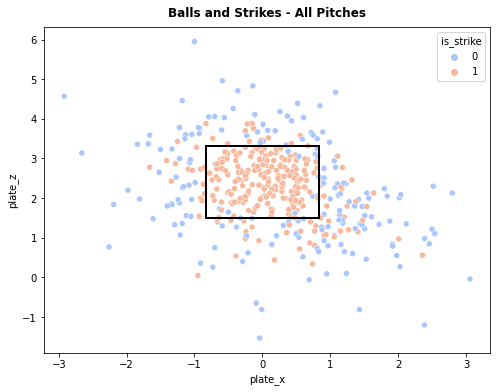

In [14]:
plt.figure(figsize = (8, 6))

sns.scatterplot(data = hicks, x = 'plate_x', y = 'plate_z', hue = 'is_strike', palette = 'coolwarm')
left, bottom, width, height = (-.83, 1.5, 1.66, 1.82)
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
#plt.xlim(-3, 3)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);

### Balls & Strikes from Hitters' Perspective

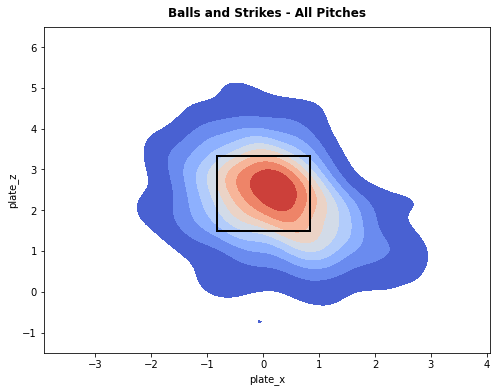

In [15]:
plt.figure(figsize = (8, 6))

sns.kdeplot(data = hicks, x = 'plate_x', y = 'plate_z', fill = True, cmap = 'coolwarm')
rect = mpatches.Rectangle((left, bottom), width, height,
                          fill = False, color = 'black', linewidth = 2)
plt.gca().add_patch(rect)
plt.ylim(-1.5, 6.5)
plt.title('Balls and Strikes - All Pitches', fontdict = font_title, pad = 15);